# LASI2021 Machine Learning Learning Workshop
## Simple Linear Regression

## 0. Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import statsmodels.api as sm
import statsmodels.formula.api as smf

## 1. Import Data

In [2]:
# import csv file
df = pd.read_csv("data/slrdata.csv")

In [3]:
df.head()

,Study_Time,Exam_Score
0,18,29
1,30,67
2,20,23
3,54,91
4,43,59


## 2. Run Regression - OLS (statsmodels)

**formula** is of form $y$ ~ $x$, where $y$ is the target variable and $x$ is the feature variable

In [5]:
# define formula that will be used for the regression
formula = "Exam_Score ~ Study_Time"

In [6]:
# fit the model using ordinary least squares and store results in object called 'slr'
slr = smf.ols(formula,df).fit()

The fundamental equation for simple linear regression is:

$$y = \beta_0 + \beta_1x$$

The parameters of the model are $\beta_0$ and $\beta_1$, where $\beta_0$ is the intercept and $\beta_1$ is the slope.

## 3. Review Results and Model Performance

In [7]:
# print results (i.e. the parameters)
print(slr.params)

Intercept     2.688686
Study_Time    1.600598
dtype: float64


The regression result, therefore, is:

$$ \color{blue}{\mbox{Exam Score}} = 2.69 + 1.60 \times \color{blue}{\mbox{Study Time}}$$

Interpretation of regression. One unit of study time (one hour) increases exam score $\times$ 1.60

In [9]:
# summary of statistics. Note the p values. Intercept is not statistically significant
slr.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.6887,2.509,1.071,0.287,-2.291,7.668
Study_Time,1.6006,0.067,24.028,0.000,1.468,1.733


In [11]:
# complete summary. Note R-squared.
slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Exam_Score   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     577.3
Date:                Sat, 19 Jun 2021   Prob (F-statistic):           7.28e-43
Time:                        21:45:53   Log-Likelihood:                -350.13
No. Observations:                 100   AIC:                             704.3
Df Residuals:                      98   BIC:                             709.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6887      2.509      1.071      0.287      -2.291       7.668
Study_Time     1.6006      0.067     24.028      0.000       1.468       1.733
==============================================================================
Omnibus:                        9.100   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.024
Skew:                          -0.624   Prob(JB):                       0.0110
Kurtosis:                       3.780   Cond. No.                         117.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# generate model predictions; if argument is left blank, will default to x used in training
y_predict = slr.predict(df['Study_Time'])

## 4. Plot Regression Line

Text(0, 0.5, 'Exam Score')

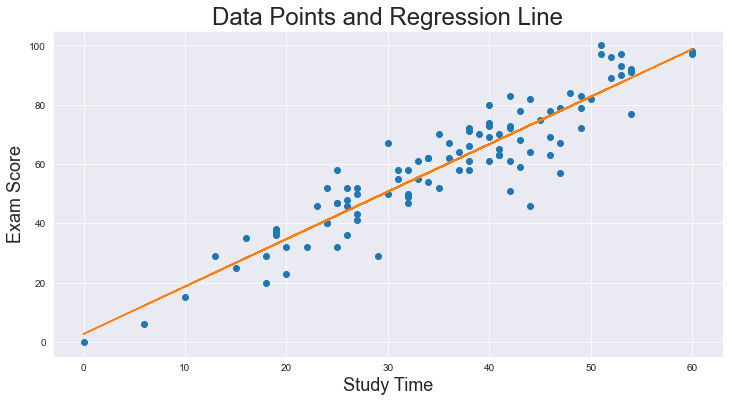

In [22]:
# plot data points and regression line
plt.figure(figsize=(12,6))
plt.plot(df['Study_Time'],df['Exam_Score'],'o')
plt.plot(df['Study_Time'],y_predict)
plt.title("Data Points and Regression Line", fontsize=24)
plt.xlabel("Study Time",fontsize=18)
plt.ylabel("Exam Score",fontsize=18)

## 5. Review Regression Assumptions

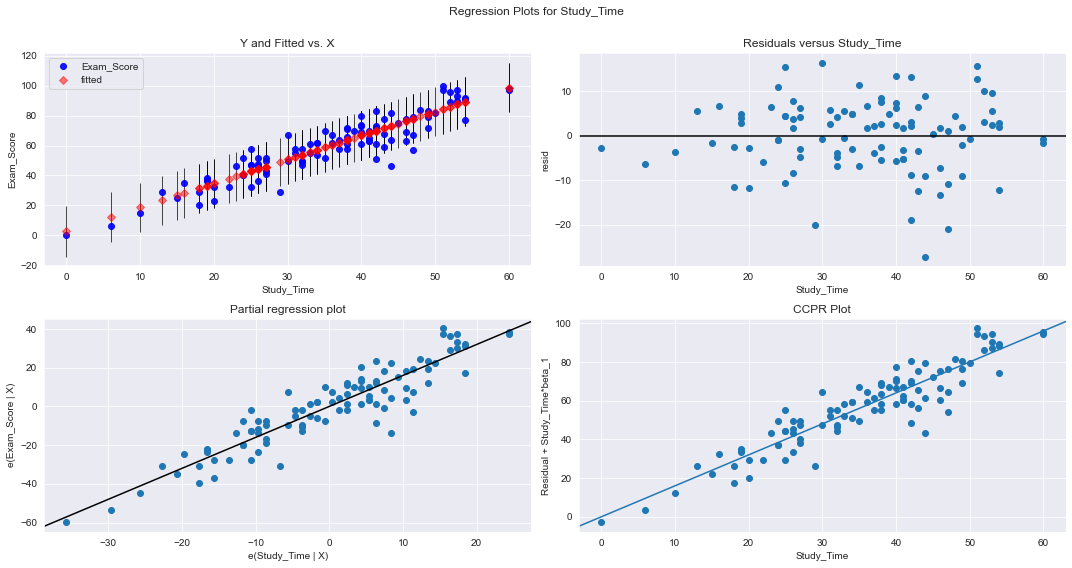

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(slr, "Study_Time", fig=fig)

## 6. Make Predictions for New Data

In [35]:
# predict values for deciles
predict_range = list(range(0,70,10))

In [36]:
new = pd.DataFrame(predict_range, columns=['Study_Time'])

In [37]:
slr.predict(new)

0     2.688686
1    18.694665
2    34.700643
3    50.706622
4    66.712601
5    82.718579
6    98.724558
dtype: float64

Text(0.5, 1.0, 'Cumulative Distribution Function')

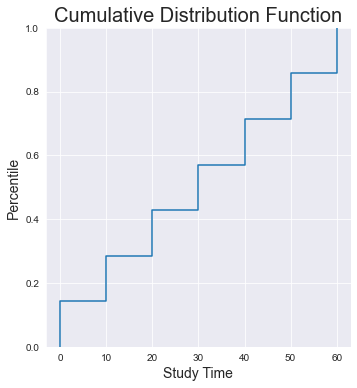

In [40]:
# plot cumulative distribution function
sns.displot(predict_range,kind="ecdf")
plt.ylabel("Percentile",fontsize=14)
plt.xlabel("Study Time",fontsize=14)
plt.title("Cumulative Distribution Function",fontsize=20)